# Linear Regression

# Importing Libraries

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (7, 5)

# Plot Function

(-5, 5)

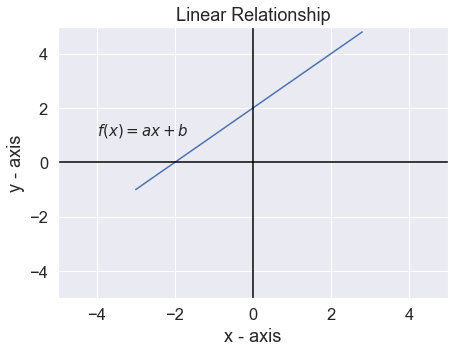

In [8]:
x = np.arange(-3, 3, 0.2)
y = 1*x + 2

ax = sns.lineplot(x, y)
ax.set_title("Linear Relationship")
ax.text(-4, 1, r'$f(x) = ax + b$', fontsize=15)

ax.set_ylabel('y - axis')
ax.set_xlabel('x - axis')
ax.axhline(color='black')
ax.axvline(color='black')

ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])

# Plot Animated Function 

In [10]:
def plot_line(x, y):
    ax = sns.lineplot(x, y)
    ax.set_title("Linear Relationship")
    ax.text(-4, 1, r'$f(x) = ax + b$', fontsize=15)

    ax.set_ylabel('y - axis')
    ax.set_xlabel('x - axis')
    ax.axhline(color='black')
    ax.axvline(color='black')

    ax.set_xlim([-5, 5])
    ax.set_ylim([-5, 5])

# Plot Animated Function 

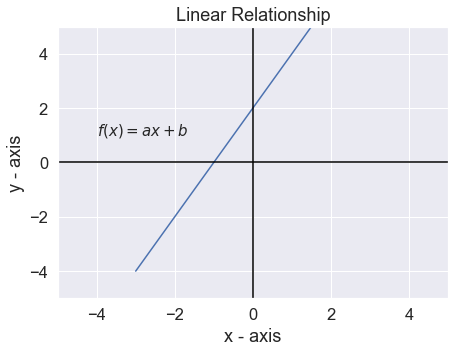

In [11]:
x = np.arange(-3, 3, 0.2)
y = 2*x + 2

plot_line(x, y)

# Plot Animated Function

In [12]:
from ipywidgets import interactive
import matplotlib.pyplot as plt

def f(m=2, b=2):
    x = np.arange(-10, 10, 0.2)
    y = m*x + b
    
    plot_line(x, y)

interactive_plot = interactive(f, m=(-5.0, 5.0), b=(-5, 5, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=2.0, description='m', max=5.0, min=-5.0), FloatSlider(value=2.0, descr…

# Linear Regression - Housing Costs

Text(0, 0.5, 'Costs (R$ X 1000)')

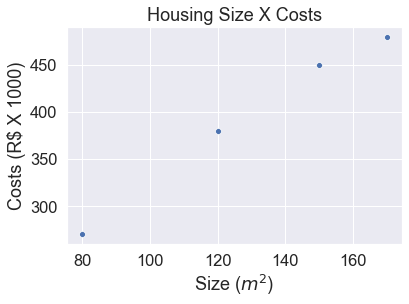

In [13]:
# Define costs and sizes

costs = np.array([450,380,480,270])
sizes = np.array([[150],[120],[170],[80]])

ax = sns.scatterplot(sizes.flatten(), costs)
ax.set_title("Housing Size X Costs")
ax.set_xlabel("Size ($m^2$)")
ax.set_ylabel("Costs (R$ X 1000)")

# Linear Regression - Housing Costs

In [14]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(sizes, costs)

In [15]:
print(f"Score: {reg.score(sizes, costs)}")
print(f"Coefficients: {reg.coef_}")
print(f"Intercept: {reg.intercept_}")

Score: 0.9895885390638014
Coefficients: [2.36956522]
Intercept: 86.9565217391305


# Linear Regression - Housing Costs

[466.08695652]


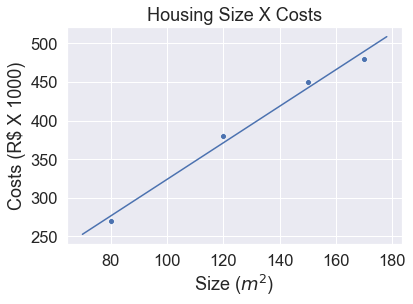

In [16]:
costs = np.array([450,380,480,270])
sizes = np.array([[150],[120],[170],[80]])

size_line = np.arange(70, 180, 2)
costs_line = reg.coef_*size_line + reg.intercept_

ax = sns.scatterplot(sizes.flatten(), costs)
ax.plot(size_line, costs_line)
ax.set_title("Housing Size X Costs")
ax.set_xlabel("Size ($m^2$)")
ax.set_ylabel("Costs (R$ X 1000)")

print(reg.predict([[160]]))

# Linear Regression - Ordinary Least Squares

In [17]:
def get_coeff(X, Y):
    x_mean = np.mean(X)
    y_mean = np.mean(Y)
    
    alpha_n = np.sum([x_i*(y_i - y_mean) for x_i, y_i in zip(X, Y)])
    alpha_d = np.sum([x_i*(x_i - x_mean) for x_i in X])
    
    alpha = alpha_n / alpha_d
    beta = y_mean - alpha*x_mean
    
    return alpha, beta

get_coeff(sizes, costs)

(2.369565217391304, 86.95652173913044)

# Linear Regression - Ordinary Least Squares

In [20]:
def get_error(X, Y):
    alpha, beta = get_coeff(X, Y)
    
    X = X.flatten()
    Y_hat = alpha*X + beta
    score =  1 - np.mean(np.abs(Y_hat - Y)) / np.mean(Y)
    
    return score

In [21]:
get_error(sizes, costs)

0.9793615850302697